In [1]:
# basic linear regression
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

/Users/Supra/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# parameters
learning_rate = 0.01
training_epochs = 1000
batch_size = 50

In [3]:
# training Data
X_train = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y_train = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
# numpy array shape returns a list whose first element is the row, second is the column
n_samples = X_train.shape[0]

In [4]:
# tf graph input (normal "float" because at a time we are using one single unit of x)
x = tf.placeholder("float")
y = tf.placeholder("float")
# set model weights ()
W = tf.Variable(numpy.random.randn(),name="weight")
b = tf.Variable(numpy.random.randn(),name="bias")

In [5]:
# construct a linear model
pred = tf.add(tf.multiply(x,W),b)
# Mean squared error (2 is for coefficient; n_samples for mean) (1/2n*(y-y^)^2) reduce sum adds up all vector units
loss = tf.reduce_sum(tf.pow(pred-y,2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [6]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 loss= 0.228473872 W= 0.46718258 b= -0.76385325
Epoch: 0100 loss= 0.210972726 W= 0.45424157 b= -0.6707565
Epoch: 0150 loss= 0.195492357 W= 0.44207013 b= -0.58319575
Epoch: 0200 loss= 0.181799933 W= 0.43062264 b= -0.5008441
Epoch: 0250 loss= 0.169688568 W= 0.4198561 b= -0.4233899
Epoch: 0300 loss= 0.158975855 W= 0.40972975 b= -0.3505416
Epoch: 0350 loss= 0.149500385 W= 0.40020564 b= -0.28202593
Epoch: 0400 loss= 0.141119316 W= 0.39124814 b= -0.21758564
Epoch: 0450 loss= 0.133706242 W= 0.3828231 b= -0.15697758
Epoch: 0500 loss= 0.127149478 W= 0.37489933 b= -0.09997436
Epoch: 0550 loss= 0.121350080 W= 0.36744687 b= -0.046361383
Epoch: 0600 loss= 0.116220653 W= 0.3604375 b= 0.0040629483
Epoch: 0650 loss= 0.111683771 W= 0.35384512 b= 0.051488385
Epoch: 0700 loss= 0.107671060 W= 0.34764478 b= 0.09609319
Epoch: 0750 loss= 0.104121983 W= 0.3418132 b= 0.13804516
Epoch: 0800 loss= 0.100983024 W= 0.33632848 b= 0.17750177
Epoch: 0850 loss= 0.098206803 W= 0.33117002 b= 0.21461171
Epoch: 

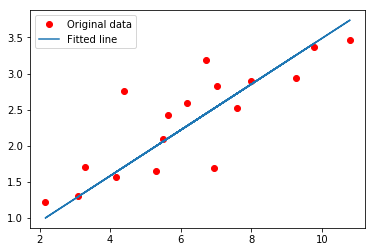

In [8]:
# session
with tf.Session() as sess:
    sess.run(init)
    # fit all training data
    for epoch in range(training_epochs):
        for (x_,y_) in zip(X_train,Y_train):
            sess.run(optimizer,feed_dict={x: x_,y: y_})
            # you can print all the variables whose values are actually changed in due course
        if (epoch+1)%batch_size == 0:
            c = sess.run(loss, feed_dict={x: X_train,y:Y_train})
            print("Epoch:",'%04d'%(epoch+1), "loss=", "{:.9f}".format(c), \
                  "W=", sess.run(W), "b=", sess.run(b))
                
    # graphic display
    plt.plot(X_train, Y_train, 'ro', label='Original data')
    plt.plot(X_train, sess.run(W) * X_train + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

Observations:
1. Never mess with variable names and types
2. Never confuse between tensor and normal variable types
3. tf.float32 is not same as float32 and vice-versa